
# Hollow Core in infinite glass 

N0 Configuration in Bird

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [11]:
A = BraggExact(ts=[15e-6,15e-6], mats=['air', 'glass'], 
               ns=[lambda x:n_air, lambda x:n_glass],
              maxhs=[.2,.02], wl=1.8e-6, scale=1.5e-5)


In [12]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [13]:
k_low = A.k0 * A.ns[0] * A.scale
outer = 'h2'
nu = 1

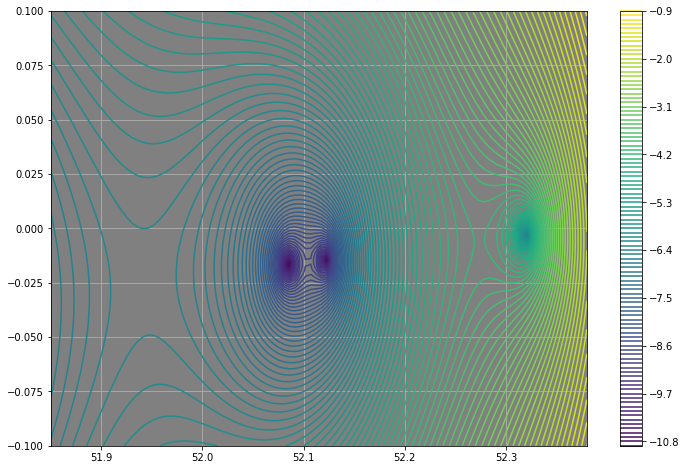

In [14]:
plotlogf(A.determinant, .99*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

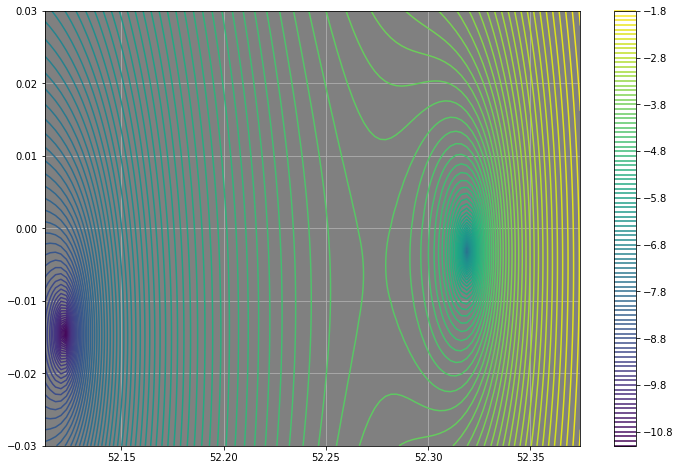

In [15]:
plotlogf(A.determinant, .995*k_low, k_low, -.03,.03, nu, outer,
         iref=100, rref=100, levels=100)

In [16]:
guess = np.array(.999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.31929998443977-0.0031273421665928584j) . Residual of determinant:  7.240997408816486e-15


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

In [ ]:
Draw(Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Etv'].Norm(), A.mesh)


In [ ]:
Draw(Fs['Ephi'], A.mesh)

In [ ]:
Draw(Fs['Hphi'], A.mesh)

# Using StepExact for comparison

In [ ]:
import numpy as np

from step_exact import StepExact,plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from step_exact.param_dicts.n0_params import params

In [ ]:
B = StepExact(params)

In [ ]:
Draw(CF([B.n_core,B.n_clad]), B.mesh)

In [ ]:
k_low = B.k0 * B.n_core * B.scale
k_high = B.k0 * B.n_clad * B.scale
clad = 'h2'
nu = 1
k_low, k_high

In [ ]:
plotlogf(B.hybrid_det, .99*k_low, 1.0001*k_low, -.1,.1, nu, clad,
         iref=100, rref=100, levels=100)

In [ ]:
plotlogf(B.hybrid_det, .995*k_low, k_low, -.025,.025, nu, clad,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(52.325)

beta2 = newton(B.hybrid_det, guess, args=(nu, clad), tol = 1e-15)

print("Scaled beta: ", beta2, ". Residual of determinant: ", abs(B.hybrid_det(beta2, nu, clad)))


In [ ]:
beta1, beta2

# Step Exact Fields

In [ ]:
Fs = B.hybrid_fields(beta1, nu, clad=clad)

In [ ]:
Draw(Fs['Ez'], B.mesh)

In [ ]:
Draw(Fs['Hz'], B.mesh)

In [ ]:
Draw(Fs['Ephi'], B.mesh)

In [ ]:
Draw(Fs['Hphi'], B.mesh)

# Notes:

- It appears that the determinant function is correct for BraggExact in the two layer case: both Step Exact and BraggExact find the same beta.  But I'm not displaying my fields correctly for BraggExact, so the place to look is in the creation of the coefficents and the fields in that class for errors.

- StepExact's eigenfunction has poles where BraggExact does not.  Also appears to have some continuum eigenvalues.  Not yet sure why these don't appear in BraggExact